In [3]:
import os
import cv2
import numpy as np
import matplotlib as plt
from tqdm import tqdm

In [4]:
DATADIR = '/content/drive/MyDrive/Colab Notebooks/flowers'
IMG_SIZE = 180
CATEGORIES = ['daisy','dandelion','rose', 'sunflower', 'tulip']

In [60]:
data = []

def create_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,[IMG_SIZE, IMG_SIZE])
        data.append([new_array,class_num])
      except:
        # in the interest in keeping the output clean
        pass

In [61]:
 create_data()
 print(len(data))

100%|██████████| 984/984 [00:13<00:00, 72.82it/s] 

4323


In [62]:
X = []
Y = []
for features, label in tqdm(data):
  X.append(features)
  Y.append(label)


100%|██████████| 4323/4323 [00:00<00:00, 700617.32it/s]


In [63]:
X = np.array(X)
Y = np.array(Y)
np.save('/content/sample_data/a.npy', X)
np.save('/content/sample_data/b.npy', Y)


In [6]:
X=np.load('/content/sample_data/a.npy')
Y=np.load('/content/sample_data/b.npy')


In [13]:
# Reshape and Flatten works in the same way
X = X.reshape(4323, -1)

In [7]:
np.shape(Y)

(4323,)

In [8]:
np.shape(X)

(4323, 180, 180, 3)

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense


import joblib
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# LDA for dimensionality reduction
#n_components_lda = 4
#lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
#X_lda = lda.fit_transform(X, Y)
#X_train, X_test, Y_train, Y_test = train_test_split(X_lda, Y, test_size = 0.20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
print(X.shape,Y.shape)

(4323, 97200) (4323,)


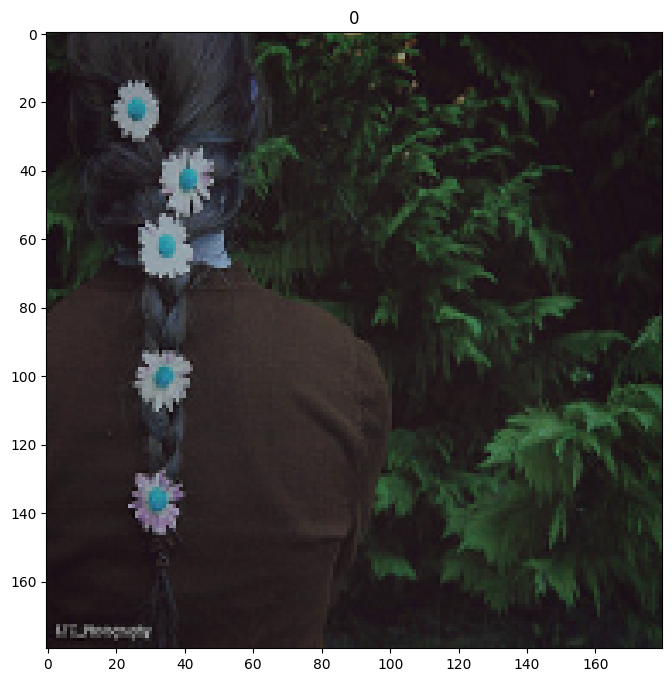

In [22]:
#X_n=np.array(X.values)
#Y_n=np.array(Y.values)
first_image = X[2, :]
# print(first_image)

new_image_array = first_image.reshape(180,180,3)#np.resize(first_image, (28, 28))

# Display the reshaped first image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(new_image_array)
# plt.label('Actual label')
# title="Actual label "+str(Y_n[1500])
plt.title(Y[2])
plt.show()

In [23]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#built an ANN model
annmodel = Sequential([
    Dense(128, activation='relu', input_shape=(97200,)),
    #Dense(580, activation='relu', input_shape=(2352,)),
    Dense(64, activation='relu'),
    #Dense(32, activation='relu'),
    Dense(5, activation='softmax'),
])

In [32]:
annmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               12441728  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 12,450,309
Trainable params: 12,450,309
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compile the model
annmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
# train model
S = time.time()
history = annmodel.fit(X_train, Y_train, epochs=50, batch_size=200, validation_data=[X_test,Y_test])
E = time.time()

Epoch 1/50
18/18 [==============================] - 10s 485ms/step - loss: 18.7600 - accuracy: 0.3713 - val_loss: 11.1491 - val_accuracy: 0.3827
Epoch 2/50
18/18 [==============================] - 11s 628ms/step - loss: 7.8243 - accuracy: 0.5385 - val_loss: 10.4487 - val_accuracy: 0.4116
Epoch 3/50
18/18 [==============================] - 11s 603ms/step - loss: 5.3556 - accuracy: 0.6322 - val_loss: 11.5075 - val_accuracy: 0.4277
Epoch 4/50
18/18 [==============================] - 8s 449ms/step - loss: 4.6136 - accuracy: 0.6874 - val_loss: 12.7269 - val_accuracy: 0.3988
Epoch 5/50
18/18 [==============================] - 10s 570ms/step - loss: 3.6628 - accuracy: 0.7452 - val_loss: 13.7499 - val_accuracy: 0.3850
Epoch 6/50
18/18 [==============================] - 10s 564ms/step - loss: 2.6902 - accuracy: 0.7799 - val_loss: 11.6521 - val_accuracy: 0.4289
Epoch 7/50
18/18 [==============================] - 8s 451ms/step - loss: 1.6283 - accuracy: 0.8329 - val_loss: 12.2443 - val_accuracy: 

In [35]:
# Evaluate the model
#print(history.history)
print(f"Train accuracy {max(history.history['accuracy'])}")
print(f"Test accuracy {max(history.history['val_accuracy'])}")
print(f"Total time taken {E-S}")

Train accuracy 0.9774436354637146
Test accuracy 0.45202311873435974
Total time taken 494.07809686660767


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


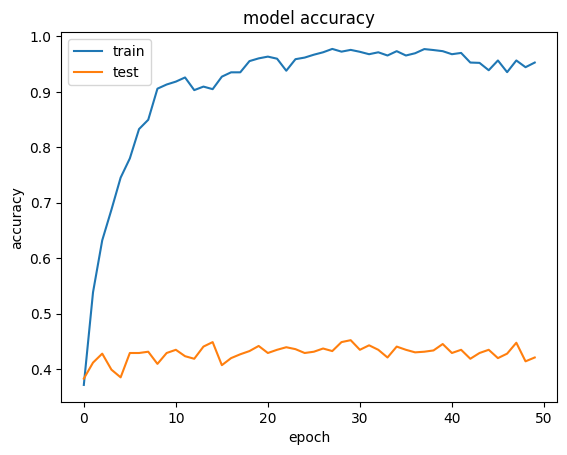

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

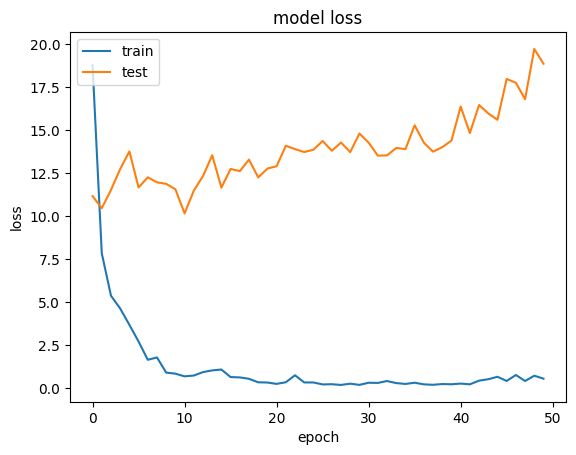

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
prediction=[]
prd=annmodel.predict(X_test[0:5,:])
prd_class=[np.argmax(i) for i in prd]
act_class= Y[0:5]
print("Predicted classes", prd_class)
print("Actual classes", act_class)

1/1 [==============================] - 0s 71ms/step
Predicted classes [3, 4, 1, 2, 1]
Actual classes [0 0 0 0 0]


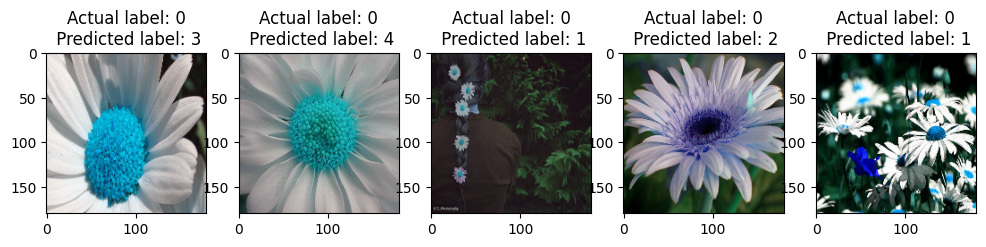

In [42]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(151+i)
    plt.imshow(X[i].reshape(180,180,3))
    plt.title("Actual label: {}\n Predicted label: {}".format(act_class[i],prd_class[i]))

# New Section

In [11]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, Activation
from tensorflow.keras import models, layers, optimizers, utils

cnn_model = Sequential()
# Input Layer
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), padding= 'Same', activation='relu', input_shape = (IMG_SIZE, IMG_SIZE,3)))
#Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#Convolutional Layer# 1
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding= 'Same', activation='relu'))
#Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Convolutional Layer# 2
cnn_model.add(Conv2D(filters=96, kernel_size=(3,3), padding= 'Same', activation='relu'))
#Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Convolutional Layer# 3
cnn_model.add(Conv2D(filters=96, kernel_size=(3,3), padding= 'Same', activation='relu'))
#Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Flattening the Input for ANN
cnn_model.add(Flatten())
# Dense Layer#1 for ANN
cnn_model.add(Dense(512))
# Activation Function for ANN
cnn_model.add(Activation('relu'))
# Output Layer for ANN
cnn_model.add(Dense(5, activation="softmax"))

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [13]:
# compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
S = time.time()
history = cnn_model.fit(X_train, Y_train, epochs=50, batch_size=200, validation_data=[X_test,Y_test])
E = time.time()

Epoch 1/50
18/18 [==============================] - 367s 20s/step - loss: 34.5258 - accuracy: 0.2345 - val_loss: 1.5974 - val_accuracy: 0.2312
Epoch 2/50
18/18 [==============================] - 384s 21s/step - loss: 1.5419 - accuracy: 0.2955 - val_loss: 1.5300 - val_accuracy: 0.3318
Epoch 3/50
18/18 [==============================] - 386s 22s/step - loss: 1.4499 - accuracy: 0.3681 - val_loss: 1.5139 - val_accuracy: 0.3561
Epoch 4/50
11/18 [=================>............] - ETA: 2:16 - loss: 1.4161 - accuracy: 0.3877